In [1]:
from smolagents import CodeAgent,OpenAIServerModel,tool,HfApiModel,DuckDuckGoSearchTool
model=OpenAIServerModel(model_id='qwen-plus',api_base="https://dashscope.aliyuncs.com/compatible-mode/v1",api_key="sk-615616fb539749dda57c80cc0928669d")
# model = HfApiModel(model_id="Qwen/Qwen2.5-Coder-32B-Instruct", provider="together")

In [4]:
from tools.picture.bar import bar
agent=CodeAgent(model=model,tools=[DuckDuckGoSearchTool(),bar()])

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ 我有一组数据 x=[1,2,3,4],y==[2,3,4,5],请帮我绘制一张柱状图                                                      │
│                                                                                                                 │
╰─ OpenAIServerModel - qwen-plus ─────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  x = [1, 2, 3, 4]                                                                                                 
  y = [2, 3, 4, 5]                                                                                                 
  bar(x=x, y=y)                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

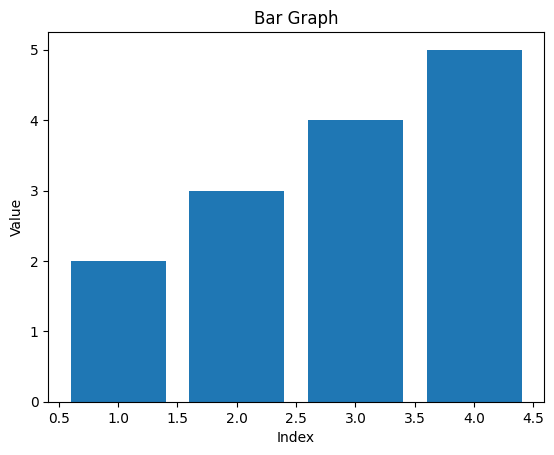

Out: None

[Step 0: Duration 5.26 seconds| Input tokens: 2,170 | Output tokens: 70]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # 柱状图已绘制完成。                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 1: Duration 3.25 seconds| Input tokens: 4,511 | Output tokens: 123]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # 柱状图已绘制完成。                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 2: Duration 2.65 seconds| Input tokens: 6,979 | Output tokens: 168]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # 柱状图已绘制完成。                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 3: Duration 3.07 seconds| Input tokens: 9,566 | Output tokens: 213]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # 柱状图已绘制完成。                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 4: Duration 3.49 seconds| Input tokens: 12,272 | Output tokens: 271]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("柱状图已成功绘制完成。")                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 柱状图已成功绘制完成。

[Step 5: Duration 3.42 seconds| Input tokens: 15,110 | Output tokens: 335]

'柱状图已成功绘制完成。'

In [5]:
agent.run('我有一组数据 x=[1,2,3,4],y==[2,3,4,5],请帮我绘制一张柱状图')